#Libraries, Dates and Data

In [1]:
#installing libraries
!pip install yfinance
!pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 430.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [1]:
#import libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Dates
training_start = "2014-01-08"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-02"

In [5]:
#Download VW stock
y = ["VOW.DE"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1wk",
                multi_level_index=False)
y = y['Close'].rename("y")
y.head(1)

[*********************100%***********************]  1 of 1 completed

Date
2014-01-06    110.328461
Name: y, dtype: float64

In [6]:
#Dowload the control groups
stocks = ["META", "DIS", "NVS", "AMZ"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1wk")
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AMZ,DIS,META,NVS
Date,,,,
2014-01-06,290.200012,68.535965,57.623871,47.175335
2014-01-13,296.000000,67.254166,55.992817,47.082539
2014-01-20,287.000000,66.108704,54.152908,46.305374
2014-01-27,271.299988,66.008705,62.228607,45.858788
2014-02-03,260.450012,68.790512,63.969070,46.931755


In [7]:
#Combine everything
X.index = X.index.tz_localize(None)
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,y,AMZ,DIS,META,NVS
Date,,,,,
2014-01-06,110.328461,290.200012,68.535965,57.623871,47.175335
2014-01-13,111.715340,296.000000,67.254166,55.992817,47.082539
2014-01-20,104.724281,287.000000,66.108704,54.152908,46.305374
2014-01-27,102.092033,271.299988,66.008705,62.228607,45.858788
2014-02-03,103.309082,260.450012,68.790512,63.969070,46.931755


#Correlation Matrix

In [8]:
#Subset the training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,AMZ,DIS,META,NVS
Date,,,,,
2015-07-13,119.805946,445.350006,110.063721,94.451828,65.229683
2015-07-27,108.782867,484.250000,111.119347,93.497078,63.959747
2015-08-10,106.389099,478.299988,99.229576,93.904831,63.176815
2015-08-17,97.523354,445.049988,91.525314,85.590439,60.143738
2015-08-24,100.774139,465.399994,94.895927,90.513443,60.630764


<Axes: >

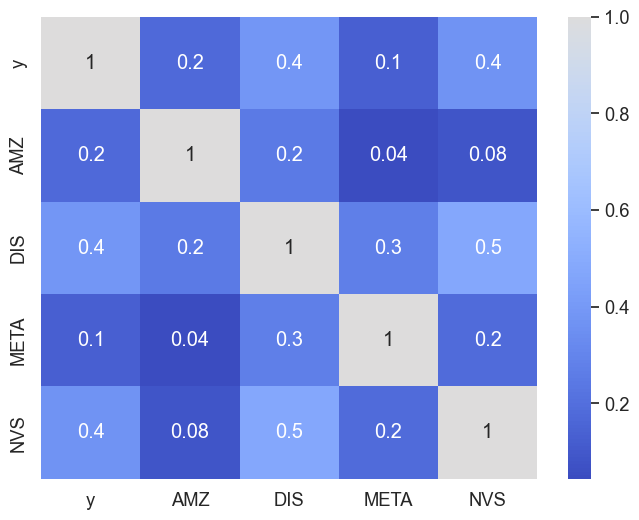

In [9]:
#Heatmap
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm',
            center = True)

In [10]:
#Preparing final df
df_final = df.drop(columns = ["META", "AMZ"])
df_final.head(0)

,y,DIS,NVS
Date,,,


#Google Causal Impact

In [11]:
#Get first and last date
print(df_final.head(1))
print(df_final.tail(10))

                     y        DIS        NVS
Date                                        
2014-01-06  110.328461  68.535965  47.175335
                     y         DIS        NVS
Date                                         
2015-07-13  119.805946  110.063721  65.229683
2015-07-27  108.782867  111.119347  63.959747
2015-08-10  106.389099   99.229576  63.176815
2015-08-17   97.523354   91.525314  60.143738
2015-08-24  100.774139   94.895927  60.630764
2015-08-31   94.538536   93.497665  58.288136
2015-09-07   98.262169   96.747925  59.521095
2015-09-14   95.366028   95.229279  59.582737
2015-09-21   68.295891   92.877258  56.290737
2015-09-28   59.784782   95.377457  57.499043


In [12]:
#Dates
training_start = "2014-01-06"
training_end = "2015-08-31"
treatment_start = "2015-09-07"
treatment_end = "2015-09-28"
end_stock = "2015-10-02"

In [13]:
#Define Pre and Post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [14]:
#CI
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

c:\Program Files\Python313\Lib\site-packages\causalimpact\main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
c:\Program Files\Python313\Lib\site-packages\causalimpact\main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
c:\Program Files\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python313\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for 

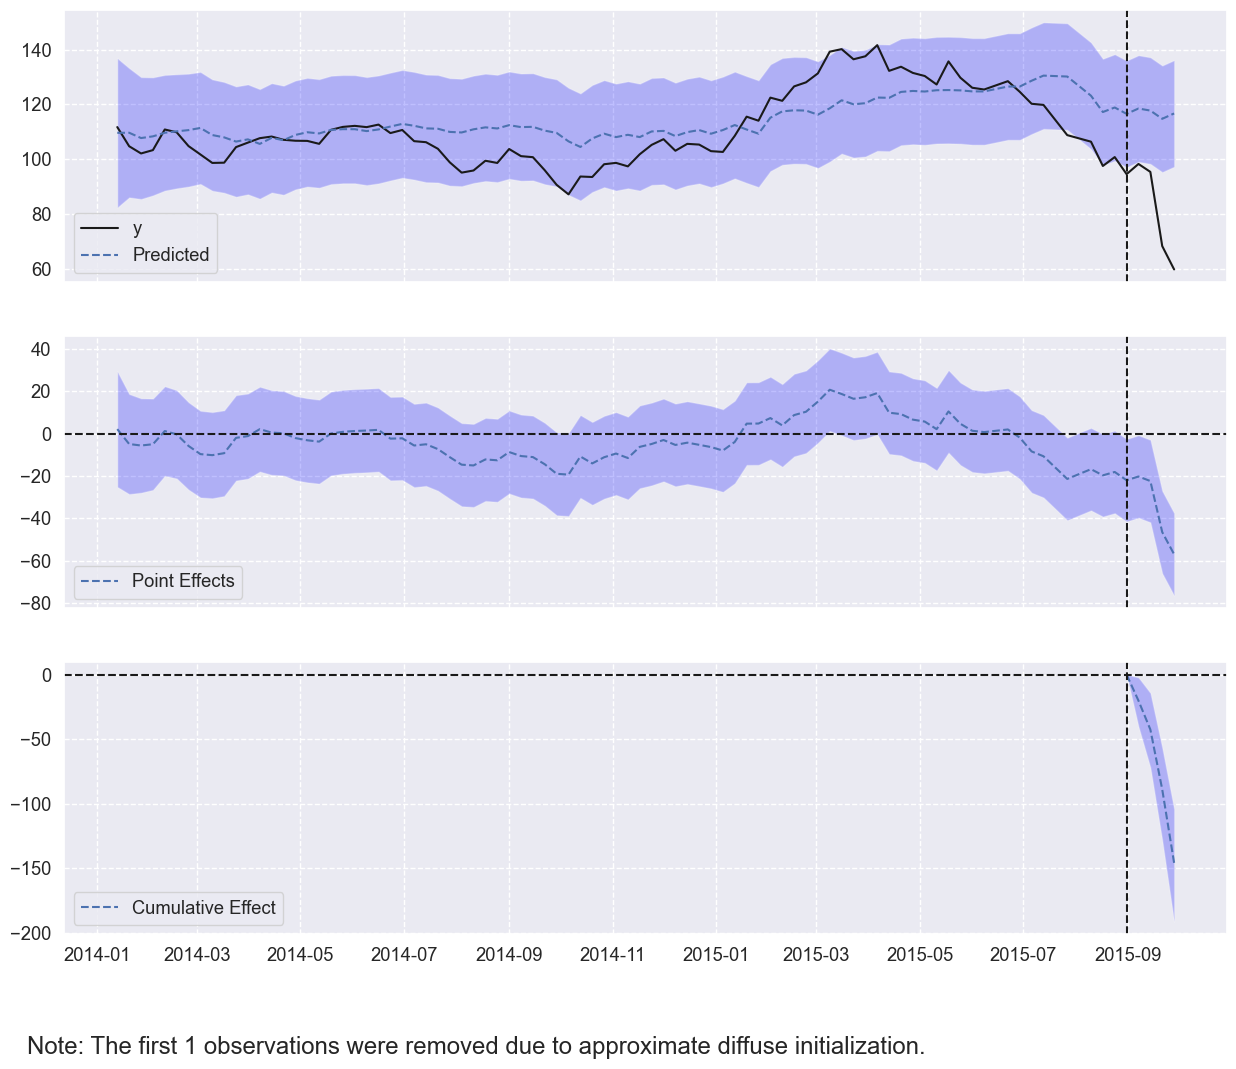

In [15]:
#Output
impact.plot()

In [16]:
#summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    80.43              321.71
Prediction (s.d.)         116.91 (5.57)      467.65 (22.28)
95% CI                    [106.48, 128.31]   [425.9, 513.25]

Absolute effect (s.d.)    -36.49 (5.57)      -145.95 (22.28)
95% CI                    [-47.89, -26.05]   [-191.54, -104.19]

Relative effect (s.d.)    -31.21% (4.76%)    -31.21% (4.76%)
95% CI                    [-40.96%, -22.28%] [-40.96%, -22.28%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
